In [3]:
import pandas as pd
import numpy as np

housing = pd.read_csv('housing-dept.csv')



/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# dates = housing['Created Date']
# dates.between_time('9:00-9:30 AM')

In [5]:
complaints = housing['Complaint Type'].value_counts().keys()
complaints = list(complaints)
complaints


['HEAT/HOT WATER',
 'UNSANITARY CONDITION',
 'PAINT/PLASTER',
 'PLUMBING',
 'DOOR/WINDOW',
 'WATER LEAK',
 'ELECTRIC',
 'FLOORING/STAIRS',
 'GENERAL',
 'APPLIANCE',
 'SAFETY',
 'OUTSIDE BUILDING',
 'ELEVATOR',
 'VACANT APARTMENT',
 'AGENCY']

In [6]:
comlist = list(housing['Complaint Type'].values)

geo_data = {'lat':housing['Latitude'].values, 
            'lon':housing['Longitude'].values}
X = np.array(zip(geo_data['lat'],geo_data['lon']))
Y = map(lambda x: complaints.index(x), comlist)


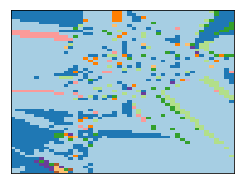

In [24]:
from sklearn import neighbors
import pylab as pl 

knn=neighbors.KNeighborsClassifier(n_neighbors=50)
knn.fit(X, Y)

h = 0.01
# x_min, x_max = X[:,0].min() - .05, X[:,0].max() + .05
x_min = 40.47
x_max = 40.94
y_min = -74.28
y_max = -73.67

# y_min, y_max = X[:,1].min() - .05, X[:,1].max() + .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

40.47 40.94
-74.28 -73.67


In [25]:
import geoplotlib as gp
from geoplotlib.utils import BoundingBox

 # Prepare data for bounding box
max_lat = max(geo_data['lat'])
print max_lat
min_lon = min(geo_data['lon'])
    #print min_lon
min_lat = min(geo_data['lat'])
    #print min_lat
max_lon = max(geo_data['lon'])
    #print max_lon
        
    
    # Create and set bounding box for map of NYC
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
gp.set_bbox(bbox)

for i in range(len(Z)):
    for j in range(len(Z[i])):
        c = float(Z[i,j])/len(complaints)
        c = map(lambda x: int(255*x), [c,c,c])
        gp.dot({'lat': xx[i,j], 'lon': yy[i,j]}, color=c)

gp.show()

40.9115873206


In [47]:
# len(Z)
# len(Z[0])
exp = []
for i in range(len(Z)):
    exp.append([])
    for j in range(len(Z[0])):
        exp[i].append(complaints[Z[i, j]])

exp = np.array(exp)

In [49]:
predicted_categories = { 'lat': [], 'lon': [], 'category': [] }
for i in range(len(Z)):
    for j in range(len(Z[0])):
        predicted_categories['lat'].append(xx[i,j])
        predicted_categories['lon'].append(yy[i,j])
        predicted_categories['category'].append(exp[i,j])

In [50]:
import json
with open('predicted-complaints.json', 'w') as fp:
    json.dump(predicted_categories, fp)
